<a href="https://colab.research.google.com/github/PragyanBeuria/Image_Processing/blob/main/Alphabackground_remover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount gdrive to colab.direct path of model

In [ ]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Background_Remover/custombg/dataset/flower_images

/content/drive/MyDrive/Background_Remover/custombg/dataset/flower_images


#Import libraries


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import numpy as np
import os

In [ ]:
!pip install opencv-python

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import os
import cv2
import numpy as np

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
from PIL import Image

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
!pip install pillow

# Model Architecture

In [ ]:
def create_model(input_shape, num_classes):
    # Define your CNN model architecture
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model


In [ ]:
# Create the model
model = create_model(input_shape,num_classes)

In [ ]:
input_shape=(256,256,3)
num_classes=5

#Load model weight previously saved

In [ ]:
# Load the model weights
model.load_weights('/content/drive/MyDrive/Background_Remover/custombg/model_weights/custombgr.h5')

In [ ]:
# Load a custom image
image_path ='/content/drive/MyDrive/Background_Remover/custombg/bird2.jpeg'
image = cv2.imread(image_path)

# Functions for creating Aplha Background

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Generate alpha background to remove background
def generate_alpha(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Binarize the image using Otsu's method
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Apply a median filter to remove noise
    binary = cv2.medianBlur(binary, 3)

    # Resize the mask to match the image size
    alpha = cv2.resize(binary, (image.shape[1], image.shape[0]))

    return alpha

# Remove background from image using alpha
def remove_background(image, alpha):
    # Create a copy of the image with 4 channels (RGBA)
    image_with_alpha = np.concatenate((image, np.expand_dims(alpha, axis=2)), axis=2)

    return image_with_alpha

# Apply post-processing to the output image for more clarity
def postprocess(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGBA2GRAY)

    # Apply bilateral filter to smooth the edges
    smoothed = cv2.bilateralFilter(gray, 9, 75, 75)

    # Apply threshold to remove any remaining artifacts
    _, binary = cv2.threshold(smoothed, 10, 255, cv2.THRESH_BINARY)

    # Apply median filter to remove noise
    binary = cv2.medianBlur(binary, 3)

    # Apply erosion to remove small holes
    kernel = np.ones((3, 3), np.uint8)
    binary = cv2.erode(binary, kernel, iterations=1)

    # Apply dilation to fill in the remaining holes
    binary = cv2.dilate(binary, kernel, iterations=1)

    # Apply bitwise-and to the original image to get the final result
    result = cv2.bitwise_and(image, image, mask=binary)

    return result


# Test on Custom image

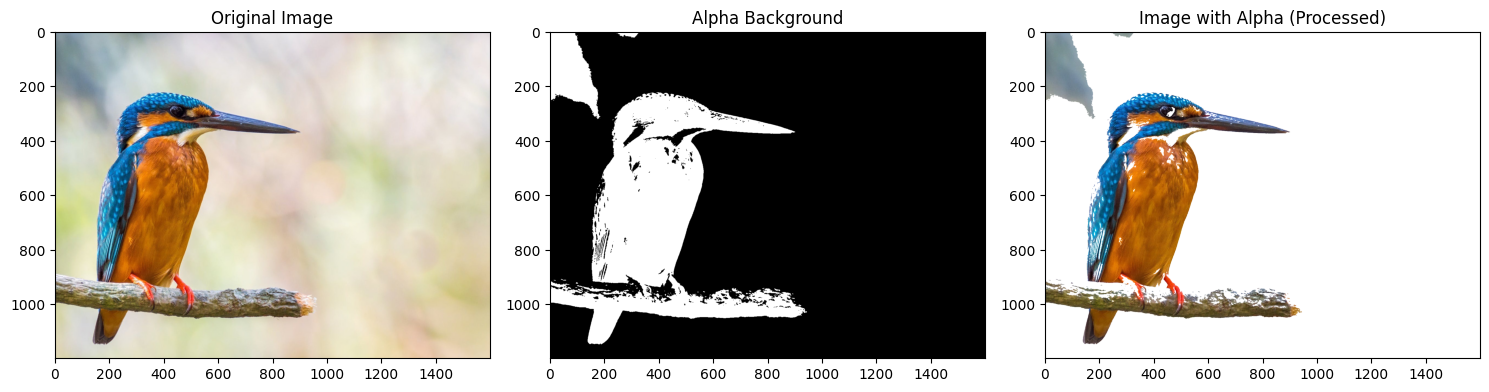

In [ ]:
# Load the image
if image is not None:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Generate the alpha background
    alpha = generate_alpha(image)

    # Remove the background
    image_with_alpha = remove_background(image, alpha)

    # Apply post-processing to the image with alpha
    image_with_alpha_processed= postprocess(image_with_alpha)

    # Display the results
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    axs[0].imshow(image)
    axs[0].set_title('Original Image')

    axs[1].imshow(alpha, cmap='gray')
    axs[1].set_title('Alpha Background')

    axs[2].imshow(image_with_alpha_processed)
    axs[2].set_title('Image with Alpha (Processed)')

    plt.tight_layout()
    plt.show()
else:
    print("Failed to load the image. Please check the image path.")


In [ ]:
image_path_='/content/drive/MyDrive/Background_Remover/custombg/sunflower.jpg'
image_=cv2.imread(image_path_)

In [ ]:
# Generate alpha background to remove background
def generated_alpha(image_):
    # Convert image to grayscale
    gray_ = cv2.cvtColor(image_, cv2.COLOR_RGB2GRAY)

    # Binarize the image using Otsu's method
    _, binary_ = cv2.threshold(gray_, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Apply a median filter to remove noise
    binary_ = cv2.medianBlur(binary_, 3)

    # Resize the mask to match the image size
    alpha_ = cv2.resize(binary_, (image_.shape[1], image_.shape[0]))

    return alpha_

In [ ]:
# Remove background from image using alpha
def removed_background(image_, alpha_):
    # Create a copy of the image with 4 channels (RGBA)
    image_with_alpha_ = np.concatenate((image_, np.expand_dims(alpha_, axis=2)), axis=2)

    return image_with_alpha_

In [ ]:
# Apply post-processing to the output image for more clarity
def postprocessed(image_):
    # Convert to grayscale
    gray_ = cv2.cvtColor(image_, cv2.COLOR_RGBA2GRAY)

    # Apply bilateral filter to smooth the edges
    smoothed_ = cv2.bilateralFilter(gray_, 9, 75, 75)

    # Apply threshold to remove any remaining artifacts
    _, binary_ = cv2.threshold(smoothed_, 10, 255, cv2.THRESH_BINARY)

    # Apply median filter to remove noise
    binary_ = cv2.medianBlur(binary_, 3)

    # Apply erosion to remove small holes
    kernel_ = np.ones((3, 3), np.uint8)
    binary_ = cv2.erode(binary_, kernel_, iterations=1)

    # Apply dilation to fill in the remaining holes
    binary_ = cv2.dilate(binary_, kernel_, iterations=1)

    # Apply bitwise-and to the original image to get the final result
    result_ = cv2.bitwise_and(image_, image_, mask=binary_)

    return result_

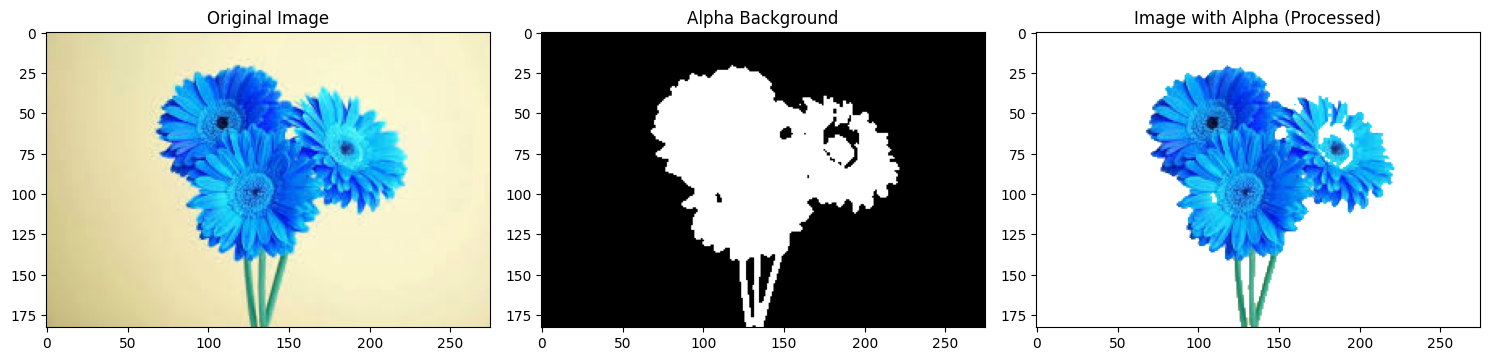

In [ ]:
# Load the image
if image_ is not None:
    image = cv2.cvtColor(image_, cv2.COLOR_BGR2RGB)

    # Generate the alpha background
    alpha_ = generated_alpha(image_)

    # Remove the background
    image_with_alpha_ = removed_background(image_, alpha_)

    # Apply post-processing to the image with alpha
    image_with_alpha_processed_ = postprocessed(image_with_alpha_)

    # Display the results
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    axs[0].imshow(image_)
    axs[0].set_title('Original Image')

    axs[1].imshow(alpha_, cmap='gray')
    axs[1].set_title('Alpha Background')

    axs[2].imshow(image_with_alpha_processed_)
    axs[2].set_title('Image with Alpha (Processed)')

    plt.tight_layout()
    plt.show()
else:
    print("Failed to load the image. Please check the image path.")
